## Assignment 19 : Training Guns Images with GAN

## Contributed by:
* Venkata Badari Nadh Gelli
* Gopinath Venkatesan
* Anurag Das
* Venugopal
* Madhura M



In this assignment we have used DCGAN to train 100 Guns Images. 

Base code is taken from https://github.com/eriklindernoren/Keras-GAN

- Modified the code to load images downloaded from internet
- Modified a few parameters
- Trained model for  5001 epochs
- Display the GAN generated guns images at varous epochs

## Import all the library

In [0]:
!unzip guns.zip

Archive:  guns.zip
   creating: guns/
  inflating: guns/frame305.jpg       
  inflating: guns/frame306.jpg       
  inflating: guns/frame307.jpg       
  inflating: guns/frame308.jpg       
  inflating: guns/frame309.jpg       
  inflating: guns/frame310.jpg       
  inflating: guns/frame311.jpg       
  inflating: guns/frame312.jpg       
  inflating: guns/frame313.jpg       
  inflating: guns/frame314.jpg       
  inflating: guns/frame315.jpg       
  inflating: guns/frame316.jpg       
  inflating: guns/frame317.jpg       
  inflating: guns/frame318.jpg       
  inflating: guns/frame319.jpg       
  inflating: guns/frame320.jpg       
  inflating: guns/frame321.jpg       
  inflating: guns/frame322.jpg       
  inflating: guns/frame323.jpg       
  inflating: guns/frame324.jpg       
  inflating: guns/frame325.jpg       
  inflating: guns/frame326.jpg       
  inflating: guns/frame327.jpg       
  inflating: guns/frame328.jpg       
  inflating: guns/frame329.jpg       
  inflating:

## Write function to load pistol images in directory

- Write function get_training_images which takes image directory, size of image and batch size as images and returns a numpy array

In [0]:
!ls

guns  guns.zip	sample_data


In [0]:
import os
fils = os.listdir('./guns')
print(fils)

['frame361.jpg', 'frame378.jpg', 'frame390.jpg', 'frame374.jpg', 'frame329.jpg', 'frame325.jpg', 'frame312.jpg', 'frame370.jpg', 'frame404.jpg', 'frame394.jpg', 'frame399.jpg', 'frame344.jpg', 'frame350.jpg', 'frame353.jpg', 'frame371.jpg', 'frame376.jpg', 'frame338.jpg', 'frame357.jpg', 'frame318.jpg', 'frame364.jpg', 'frame314.jpg', 'frame347.jpg', 'frame393.jpg', 'frame360.jpg', 'frame384.jpg', 'frame348.jpg', 'frame358.jpg', 'frame315.jpg', 'frame383.jpg', 'frame355.jpg', 'frame398.jpg', 'frame311.jpg', 'frame381.jpg', 'frame367.jpg', 'frame330.jpg', 'frame345.jpg', 'frame387.jpg', 'frame392.jpg', 'frame397.jpg', 'frame333.jpg', 'frame388.jpg', 'frame391.jpg', 'frame351.jpg', 'frame365.jpg', 'frame366.jpg', 'frame317.jpg', 'frame321.jpg', 'frame380.jpg', 'frame401.jpg', 'frame386.jpg', 'frame334.jpg', 'frame346.jpg', 'frame352.jpg', 'frame354.jpg', 'frame363.jpg', 'frame342.jpg', 'frame403.jpg', 'frame349.jpg', 'frame332.jpg', 'frame309.jpg', 'frame324.jpg', 'frame322.jpg', 'frame3

In [0]:
for f in fils:
  if f.endswith('.jpg'):
    guns_img = cv2.imread('./guns/' + f)
    guns_img1 = cv2.resize(guns_img, (100,100), interpolation = cv2.INTER_AREA)
    cv2.imwrite('./guns/' + f,guns_img1)
    print(guns_img1.shape)

(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 

In [0]:
guns_new = cv2.imread('./guns/frame400.jpg')
guns_new.shape

(100, 100, 3)

In [0]:
!unzip pistols_out.zip

Archive:  pistols_out.zip
   creating: pistols_out/


In [0]:
from __future__ import print_function, division

from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam

import matplotlib.pyplot as plt

import sys

import numpy as np


from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img



In [0]:

def get_training_images(image_dir, target_size=(100,100), batch_size=2):
    data_gen = ImageDataGenerator()
    data_generator = data_gen.flow_from_directory(
    image_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode=None)
    data_list = []
    batch_index = 0

    while batch_index <= data_generator.batch_index:               
        data = data_generator.next()
        data_list.append(data)
        batch_index = batch_index + 1
    data_array = np.asarray(data_list[0])
    return data_array


In [0]:
!unzip data.zip

Archive:  data.zip
   creating: data/


In [0]:
X_train = get_training_images('./data')
type(X_train)
# data_gen = ImageDataGenerator()
# data_generator = data_gen.flow_from_directory(
# './guns',
# target_size=(100,100),
# batch_size=16,
# class_mode=None)
# data_list = []
# batch_index = 0
# while batch_index <= data_generator.batch_index:               
#   data = data_generator.next()
#   print(len(data))
#   data_list.append(data)
#   print(len(data_list))
#   batch_index = batch_index + 1
# data_array = np.asarray(data_list[0])

Found 100 images belonging to 1 classes.


numpy.ndarray

In [0]:
!ls data/guns

frame305.jpg  frame325.jpg  frame345.jpg  frame365.jpg	frame385.jpg
frame306.jpg  frame326.jpg  frame346.jpg  frame366.jpg	frame386.jpg
frame307.jpg  frame327.jpg  frame347.jpg  frame367.jpg	frame387.jpg
frame308.jpg  frame328.jpg  frame348.jpg  frame368.jpg	frame388.jpg
frame309.jpg  frame329.jpg  frame349.jpg  frame369.jpg	frame389.jpg
frame310.jpg  frame330.jpg  frame350.jpg  frame370.jpg	frame390.jpg
frame311.jpg  frame331.jpg  frame351.jpg  frame371.jpg	frame391.jpg
frame312.jpg  frame332.jpg  frame352.jpg  frame372.jpg	frame392.jpg
frame313.jpg  frame333.jpg  frame353.jpg  frame373.jpg	frame393.jpg
frame314.jpg  frame334.jpg  frame354.jpg  frame374.jpg	frame394.jpg
frame315.jpg  frame335.jpg  frame355.jpg  frame375.jpg	frame395.jpg
frame316.jpg  frame336.jpg  frame356.jpg  frame376.jpg	frame396.jpg
frame317.jpg  frame337.jpg  frame357.jpg  frame377.jpg	frame397.jpg
frame318.jpg  frame338.jpg  frame358.jpg  frame378.jpg	frame398.jpg
frame319.jpg  frame339.jpg  frame359.jpg  frame3

## Define DCGAN Model 

In [0]:
class DCGAN():
    def __init__(self):
        # Input shape
        self.img_rows = 100
        self.img_cols = 100
        self.channels = 3
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = 1024

        optimizer = Adam(0.0002, 0.5)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise as input and generates imgs
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines validity
        valid = self.discriminator(img)

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, valid)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)

    def build_generator(self):

        model = Sequential()

        model.add(Dense(128 * 25 * 25, activation="relu", input_dim=self.latent_dim))
        model.add(Reshape((25, 25, 128)))
        model.add(UpSampling2D())
        model.add(Conv2D(64, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        model.add(UpSampling2D())
        model.add(Conv2D(64, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        model.add(Conv2D(self.channels, kernel_size=3, padding="same"))
        model.add(Activation("tanh"))

        model.summary()

        noise = Input(shape=(self.latent_dim,))
        img = model(noise)

        return Model(noise, img)

    def build_discriminator(self):

        model = Sequential()

        model.add(Conv2D(32, kernel_size=3, strides=1, input_shape=self.img_shape, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
        model.add(ZeroPadding2D(padding=((0,1),(0,1))))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(256, kernel_size=3, strides=1, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Flatten())
        model.add(Dense(1, activation='sigmoid'))

        model.summary()

        img = Input(shape=self.img_shape)
        validity = model(img)

        return Model(img, validity)

    def train(self, epochs, batch_size=50, save_interval=50):

        # Load the dataset
        #(X_train, _), (_, _) = mnist.load_data()
        X_train = get_training_images('./data')
       # print("X_train:" + str(X_train))
        #print("X_train shape:" + str(X_train.shape))
        

        # Rescale -1 to 1
        X_train = X_train / 127.5 - 1.
        #X_train = np.expand_dims(X_train, axis=3)
        print("X_train shape:" + str(X_train.shape))
        #System.exit(0)

        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select a random half of images
            #print(X_train.shape[0])
            print(batch_size)

            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]

            # Sample noise and generate a batch of new images
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            gen_imgs = self.generator.predict(noise)

            # Train the discriminator (real classified as ones and generated as zeros)
            d_loss_real = self.discriminator.train_on_batch(imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            #  Train Generator
            # ---------------------

            # Train the generator (wants discriminator to mistake images as real)
            g_loss = self.combined.train_on_batch(noise, valid)

            # Plot the progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

            # If at save interval => save generated image samples
            if epoch % save_interval == 0:
                self.save_imgs(epoch)

    def save_imgs(self, epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,])
                axs[i,j].axis('off')
                cnt += 1
        fig.savefig("./pistols_out/pistols_%d.jpg" % epoch)
        plt.close()



## Train DCGAN model for 5000 epochs

In [0]:
dcgan = DCGAN()
dcgan.train(epochs=5001, batch_size=128, save_interval=1000)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 100, 100, 32)      896       
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 100, 100, 32)      0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 50, 50, 64)        18496     
_________________________________________________________________
zero_padding2d_4 (ZeroPaddin (None, 51, 51, 64)        0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 51, 51, 64)        256       
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 51, 51, 64)       

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: 4.959115, acc.: 13.67%] [G loss: 0.222620]
128


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Streaming output truncated to the last 5000 lines.
2501 [D loss: 8.059048, acc.: 50.00%] [G loss: 16.118095]
128
2502 [D loss: 8.059048, acc.: 50.00%] [G loss: 16.118095]
128
2503 [D loss: 8.059048, acc.: 50.00%] [G loss: 16.118095]
128
2504 [D loss: 8.059048, acc.: 50.00%] [G loss: 16.118095]
128
2505 [D loss: 8.059048, acc.: 50.00%] [G loss: 16.118095]
128
2506 [D loss: 8.059048, acc.: 50.00%] [G loss: 16.118095]
128
2507 [D loss: 8.059048, acc.: 50.00%] [G loss: 16.118095]
128
2508 [D loss: 8.059048, acc.: 50.00%] [G loss: 16.118095]
128
2509 [D loss: 8.059048, acc.: 50.00%] [G loss: 16.118095]
128
2510 [D loss: 8.059048, acc.: 50.00%] [G loss: 16.118095]
128
2511 [D loss: 8.059048, acc.: 50.00%] [G loss: 16.118095]
128
2512 [D loss: 8.059048, acc.: 50.00%] [G loss: 16.118095]
128
2513 [D loss: 8.059048, acc.: 50.00%] [G loss: 16.118095]
128
2514 [D loss: 8.059048, acc.: 50.00%] [G loss: 16.118095]
128
2515 [D loss: 8.059048, acc.: 50.00%] [G loss: 16.118095]
128
2516 [D loss: 8.059

## Results
## GAN Generated Images after 1st epoch

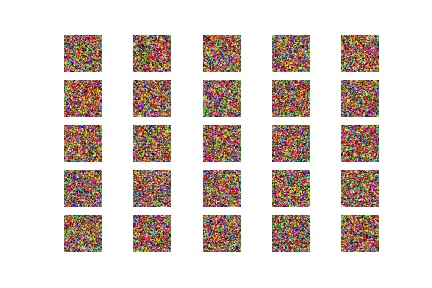

In [0]:
from IPython.display import Image
Image("pistols_out/pistols_0.jpg")

## GAN Generated Images after 1000 epochs

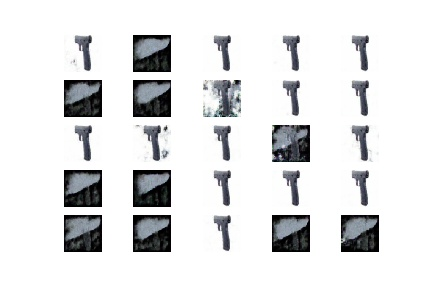

In [0]:
from IPython.display import Image
Image("pistols_out/pistols_1000.jpg")

## GAN Generated Images after 2000 epochs

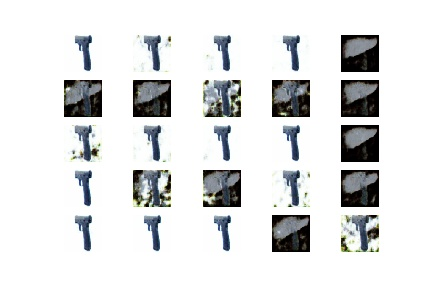

In [0]:
from IPython.display import Image
Image("pistols_out/pistols_2000.jpg")

## GAN Generated Images after 3000 epochs


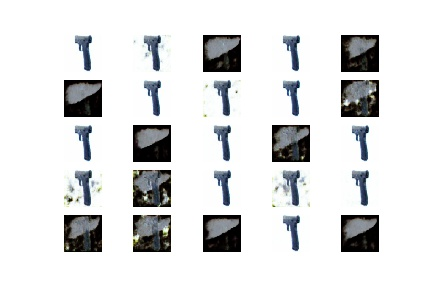

In [0]:
from IPython.display import Image
Image("pistols_out/pistols_3000.jpg")

## GAN Generated Images after 4000 epochs

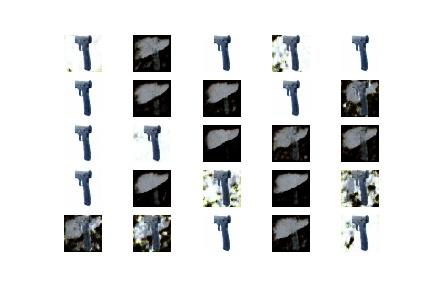

In [0]:
from IPython.display import Image
Image("pistols_out/pistols_4000.jpg")

## GAN generated Images after 5000 epochs

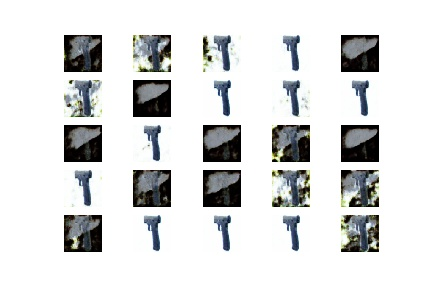

In [0]:
from IPython.display import Image
Image("pistols_out/pistols_5000.jpg")

## Observation:

In this assignment,we have trained Guns Images using DCGAN and got generated images which is of resonable newer guns images. More training can be done to improve quality of images